In [ ]:
!pip install h5py

In [ ]:
!pip install typing-extensions

In [ ]:
!pip install wheel

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 99.0 MB/s eta 0:0

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/data_2.csv'
df = pd.read_csv(path)

In [ ]:
# from pycaret.datasets import get_data
# credit_dataset = get_data(df)

In [ ]:
from pycaret.classification import *
s = setup(df, target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(65316, 3)"
4,Transformed data shape,"(65316, 3)"
5,Transformed train set shape,"(45721, 3)"
6,Transformed test set shape,"(19595, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from sklearn.metrics import log_loss
add_metric('logloss', 'Log Loss', log_loss, greater_is_better=False)

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.5410
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.2080
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.1750
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.1840
dt,Decision Tree Classifier,0.9999,0.9999,0.9999,1.0000,0.9999,0.9999,0.9999,0.0024,0.1090
et,Extra Trees Classifier,0.9999,1.0000,1.0000,0.9997,0.9999,0.9997,0.9997,0.0047,0.3170
lightgbm,Light Gradient Boosting Machine,0.9995,1.0000,0.9996,0.9994,0.9995,0.9991,0.9991,0.0166,0.4250
knn,K Neighbors Classifier,0.9974,0.9992,1.0000,0.9943,0.9971,0.9947,0.9947,0.0946,0.4110
lr,Logistic Regression,0.9617,0.9933,0.9397,0.9761,0.9575,0.9228,0.9233,1.3788,1.1680
svm,SVM - Linear Kernel,0.9492,0.0000,0.9119,0.9763,0.9421,0.8970,0.8998,1.8321,0.0710


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.5410,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5440
1,0.5411,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5397
2,0.5411,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5397
3,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
4,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
5,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
6,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
7,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
8,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

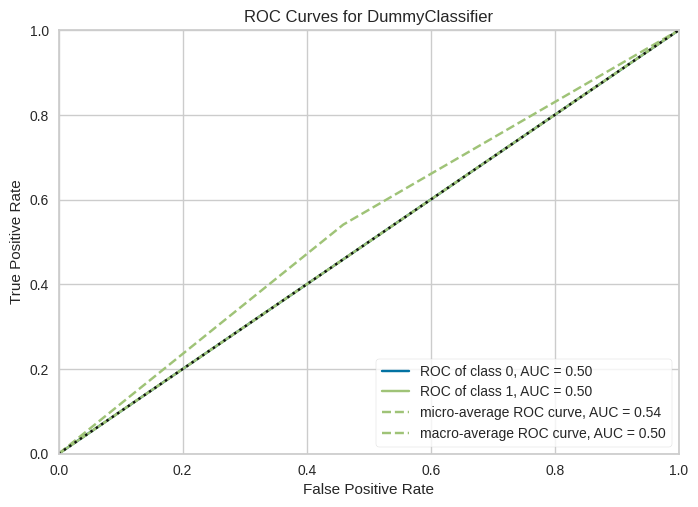

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
2,0.9998,0.9998,1.0000,0.9995,0.9998,0.9996,0.9996,0.0079
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9998,0.9998,0.9995,1.0000,0.9998,0.9996,0.9996,0.0079
5,0.9998,0.9998,0.9995,1.0000,0.9998,0.9996,0.9996,0.0079
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

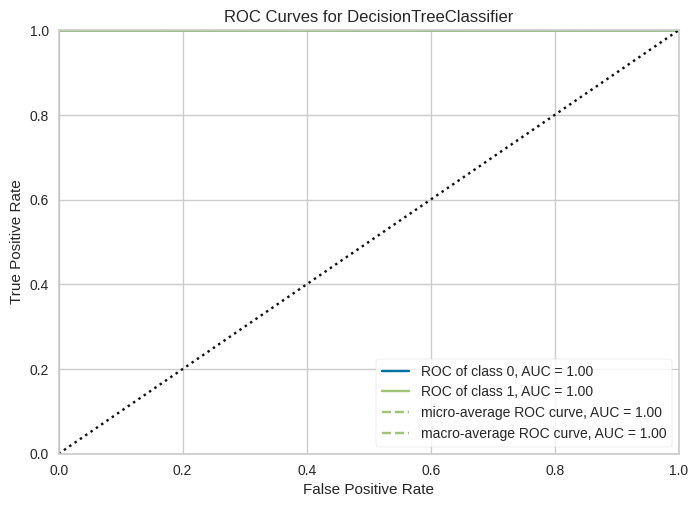

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.9103,0.9941,0.8118,0.9913,0.8926,0.8170,0.8290,3.2316
1,0.9068,0.9917,0.8084,0.9860,0.8884,0.8098,0.8216,3.3584
2,0.9009,0.9945,0.7931,0.9887,0.8802,0.7974,0.8115,3.5713
3,0.9164,0.9950,0.8232,0.9937,0.9005,0.8296,0.8405,3.0115
4,0.9046,0.9892,0.8075,0.9815,0.8860,0.8054,0.8167,3.4372
5,0.9129,0.9937,0.8204,0.9880,0.8964,0.8224,0.8330,3.1377
6,0.9009,0.9939,0.7928,0.9893,0.8802,0.7975,0.8117,3.5713
7,0.9086,0.9937,0.8104,0.9884,0.8906,0.8134,0.8252,3.2953
8,0.9066,0.9921,0.8075,0.9866,0.8881,0.8093,0.8213,3.3663


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

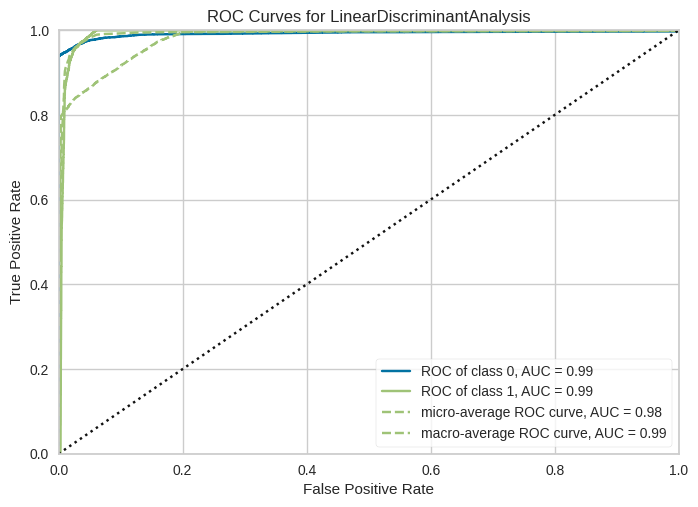

In [ ]:
# dm = create_model('dummy')
# plot_model(dm, plot = 'auc')
# dt = create_model('dt')
# plot_model(dt, plot = 'auc')
# lda = create_model('lda')
# plot_model(lda, plot = 'auc')

In [ ]:

import matplotlib.pyplot as plt
specific_models = ['lda', 'dt', 'dummy']
trained_models = [create_model(model) for model in specific_models]

# Plot ROC curves for the selected models using scikit-learn
plt.figure(figsize=(10, 6))

for model in trained_models:
    model_name = str(model).split('Model')[0].strip()
    y_pred_prob = predict_model(model)
    fpr, tpr, _ = roc_curve(y_pred_prob['target'], y_pred_prob['Score'])
    auc_score = roc_auc_score(y_pred_prob['target'], y_pred_prob['Score'])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Selected Models')
plt.legend(loc='lower right')
plt.show()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.9103,0.9941,0.8118,0.9913,0.8926,0.8170,0.8290,3.2316
1,0.9068,0.9917,0.8084,0.9860,0.8884,0.8098,0.8216,3.3584
2,0.9009,0.9945,0.7931,0.9887,0.8802,0.7974,0.8115,3.5713
3,0.9164,0.9950,0.8232,0.9937,0.9005,0.8296,0.8405,3.0115
4,0.9046,0.9892,0.8075,0.9815,0.8860,0.8054,0.8167,3.4372
5,0.9129,0.9937,0.8204,0.9880,0.8964,0.8224,0.8330,3.1377
6,0.9009,0.9939,0.7928,0.9893,0.8802,0.7975,0.8117,3.5713
7,0.9086,0.9937,0.8104,0.9884,0.8906,0.8134,0.8252,3.2953
8,0.9066,0.9921,0.8075,0.9866,0.8881,0.8093,0.8213,3.3663


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
2,0.9998,0.9998,1.0000,0.9995,0.9998,0.9996,0.9996,0.0079
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
4,0.9998,0.9998,0.9995,1.0000,0.9998,0.9996,0.9996,0.0079
5,0.9998,0.9998,0.9995,1.0000,0.9998,0.9996,0.9996,0.0079
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.5410,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5440
1,0.5411,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5397
2,0.5411,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5397
3,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
4,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
5,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
6,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
7,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476
8,0.5409,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5476


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
0,Linear Discriminant Analysis,0.9071,0.9921,0.8086,0.9867,0.8888,0.8104,0.8222,3.3478


KeyError: ignored

<Figure size 1000x600 with 0 Axes>